<a href="https://colab.research.google.com/github/gabrielgastaldo/An-lise-de-Vendas-Ecommerce/blob/main/An%C3%A1lise_de_Vendas_Ecommerce_XPTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problema de negócio
A XPTO é um ecommerce que atua nos estados unidos, o diretor de marketing está passando por alguns problemas para definir as estratégias das campanhas de 2019, e pediu que realizassemos uma análise das vendas baseado em alguns problemas de negócio que ele identificou.

Suposições:
- As colunas ('Row ID', 'Ship Date', 'Ship Date', 'Customer Name', 'Postal Code', 'Product Name', 'Quantity', 'Discount', 'Profit') não vão ser pertinentes para a análise

Entre as perguntas de pesquisa, temos:
1. Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?
2. Qual o Total de Vendas por Estado?
3. Quais São as 10 Cidades com Maior Total de Vendas?
4. Qual Segmento Teve o Maior Total de Vendas?
5. Qual o Total de Vendas Por Segmento e Por Ano?
6. Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:
- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

   Quantas Vendas Receberiam 15% de Desconto?
7. Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?
8. Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?
9. Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?



In [47]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.12


In [48]:
# Importando pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [49]:
# Carrega o dataset
from google.colab import drive
drive.mount('/content/drive')

caminho = '/content/drive/MyDrive/Datasets /Sample - Superstore - Orders.csv'
df = pd.read_csv(caminho)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# Shape
df.shape

(9994, 21)

In [51]:
# Amostra dos dados
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,"261,96",2,0,"41,9136"
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...","731,94",3,0,"219,582"
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,"14,62",2,0,"6,8714"
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,"957,5775",5,"0,45","-383,031"
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,"22,368",2,"0,2","2,5164"


In [52]:
# Amostra dos dados
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,"25,248",3,"0,2","4,1028"
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,"91,96",2,0,"15,6332"
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,"258,576",2,"0,2","19,3932"
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""","29,6",4,0,"13,32"
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...","243,16",2,0,"72,948"


In [53]:
# Remover colunas
colunas_remover = ['Row ID', 'Ship Date', 'Ship Date', 'Customer Name', 'Region', 'Postal Code', 'Product Name', 'Quantity', 'Discount', 'Profit']
df.drop(columns=colunas_remover, inplace = True)

In [54]:
df.head()

,Order ID,Order Date,Ship Mode,Customer ID,Segment,Country,City,State,Product ID,Category,Sub-Category,Sales
0,CA-2016-152156,11/8/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,"261,96"
1,CA-2016-152156,11/8/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,"731,94"
2,CA-2016-138688,6/12/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,"14,62"
3,US-2015-108966,10/11/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,"957,5775"
4,US-2015-108966,10/11/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,"22,368"


In [55]:
# Renomear colunas
renomear_colunas = {
    'Order ID': 'ID_Pedido',
    'Order Date': 'Data_Pedido',
    'Ship Mode': 'Ship_Mode',
    'Customer ID': 'ID_Cliente',
    'Segment': 'Segmento',
    'Country': 'Pais',
    'City': 'Cidade',
    'State': 'Estado',
    'Product ID': 'ID_Produto',
    'Category': 'Categoria',
    'Sub-Category': 'SubCategoria',
    'Sales': 'Valor_Venda'}
df.rename(columns=renomear_colunas, inplace = True)

In [56]:
df.head()

,ID_Pedido,Data_Pedido,Ship_Mode,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2016-152156,11/8/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,"261,96"
1,CA-2016-152156,11/8/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,"731,94"
2,CA-2016-138688,6/12/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,"14,62"
3,US-2015-108966,10/11/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,"957,5775"
4,US-2015-108966,10/11/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,"22,368"


## Análise Exploratória

In [57]:
# Colunas do conjunto de dados
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'Ship_Mode', 'ID_Cliente', 'Segmento',
       'Pais', 'Cidade', 'Estado', 'ID_Produto', 'Categoria', 'SubCategoria',
       'Valor_Venda'],
      dtype='object')

In [58]:
# Verificando o tipo de dado de cada coluna
df.dtypes

ID_Pedido       object
Data_Pedido     object
Ship_Mode       object
ID_Cliente      object
Segmento        object
Pais            object
Cidade          object
Estado          object
ID_Produto      object
Categoria       object
SubCategoria    object
Valor_Venda     object
dtype: object

In [59]:
# Transformar os dados de venda de 'obj' para 'int'
df['Valor_Venda'] = df['Valor_Venda'].str.replace(',', '.')  # Remova vírgulas se houver
df['Valor_Venda'] = df['Valor_Venda'].astype(float)

In [60]:
df.dtypes

ID_Pedido        object
Data_Pedido      object
Ship_Mode        object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [61]:
# Resumo estatístico da coluna com o valor de venda
df['Valor_Venda'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Valor_Venda, dtype: float64

In [62]:
# Verificando se há registros duplicados
df[df.duplicated()]

,ID_Pedido,Data_Pedido,Ship_Mode,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
3406,US-2014-150119,4/23/2014,Standard Class,LB-16795,Home Office,United States,Columbus,Ohio,FUR-CH-10002965,Furniture,Chairs,281.372


In [63]:
# Verificando de há valores ausentes
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
Ship_Mode       0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [64]:
df.head()

,ID_Pedido,Data_Pedido,Ship_Mode,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2016-152156,11/8/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2016-152156,11/8/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2016-138688,6/12/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2015-108966,10/11/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2015-108966,10/11/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [65]:
# Criar df com apenas a categoria 'Office Supplies'
df_p1 = df[df['Categoria'] == 'Office Supplies']

In [66]:
# Agrupando cidades pela soma do valor de vendas
vendas_por_cidade = df_p1.groupby('Cidade')['Valor_Venda'].sum()

In [67]:
# Ordenando as cidades no sentido decrescente
cidades_ordenadas_por_vendas = vendas_por_cidade.sort_values(ascending=False)

In [68]:
# Separando a cidade com maior valor de vendas
cidade_maior_venda = cidades_ordenadas_por_vendas.idxmax()
total_vendas_maior_cidade = cidades_ordenadas_por_vendas.max()

In [69]:
# Printando resposta
print("\nA cidade com o maior total de vendas de produtos da categoria 'Office Supplies' é:", cidade_maior_venda)
print("Total de vendas nessa cidade:", total_vendas_maior_cidade)


A cidade com o maior total de vendas de produtos da categoria 'Office Supplies' é: New York City
Total de vendas nessa cidade: 71361.006


## Pergunta de Negócio 2:

### Qual o Total de Vendas por Estado?

In [70]:
# Agrupar por estado e calculamos o total de vendas
df_p2 = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

In [71]:
df_p2.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35282.0010
2,Arkansas,11678.1300
3,California,457687.6315
4,Colorado,32108.1180


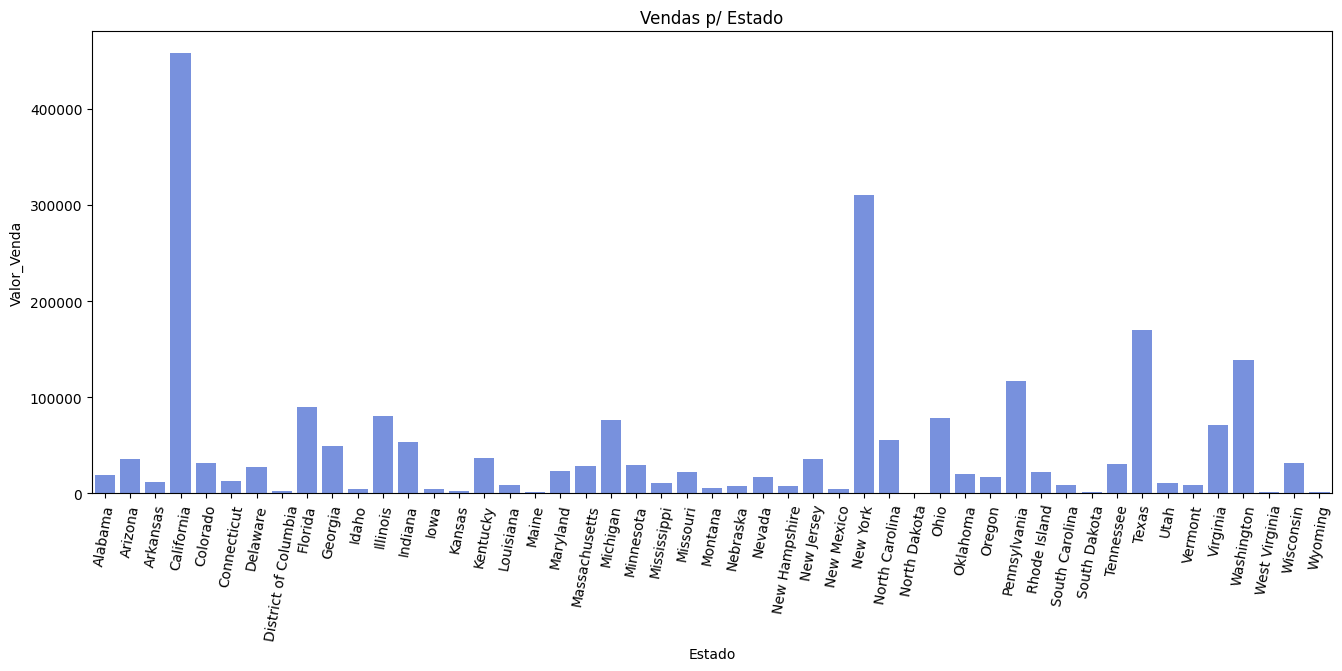

In [72]:
# Plot
plt.figure(figsize = (16, 6))
sns.barplot(data = df_p2,
           y = 'Valor_Venda',
           x = 'Estado').set(title = 'Vendas p/ Estado')
plt.xticks(rotation = 80)
plt.show()

## Pergunta de Negócio 3:

### Quais São as 10 Cidades com Maior Total de Vendas?

In [73]:
# Agrupar por cidade, calcular o total de vendas e ordenar listando somente os 10 primeiros registros
df_p3 = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False).head(10)

In [74]:
df_p3.head(10)

,Cidade,Valor_Venda
329,New York City,256368.1610
266,Los Angeles,175851.3410
452,Seattle,119540.7420
438,San Francisco,112669.0920
374,Philadelphia,109077.0130
207,Houston,64504.7604
80,Chicago,48539.5410
437,San Diego,47521.0290
216,Jacksonville,44713.1830
464,Springfield,43054.3420


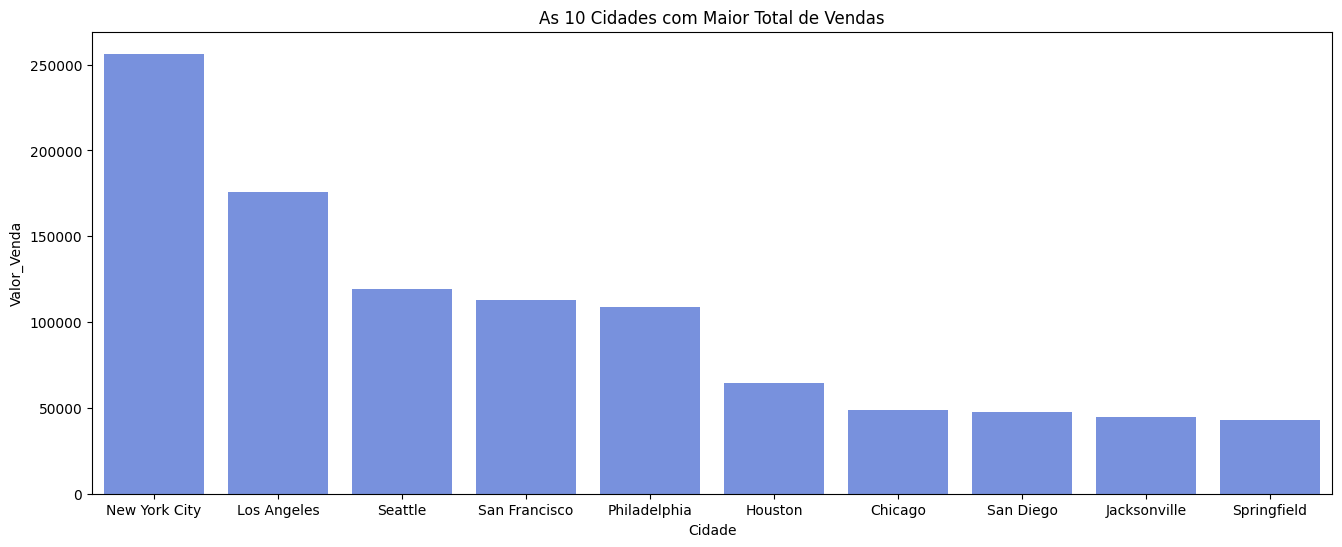

In [75]:
# Plot
plt.figure(figsize = (16, 6))
sns.set_palette('coolwarm')
sns.barplot(data = df_p3,
            y = 'Valor_Venda',
            x = 'Cidade').set(title = 'As 10 Cidades com Maior Total de Vendas')
plt.show()

## Pergunta de Negócio 4:

### Qual Segmento Teve o Maior Total de Vendas?

In [76]:
# Agrupar por segmento e calcular o total de vendas
df_p4 = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False)

In [118]:
df_p4.head()

,Segmento,Valor_Venda
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


In [117]:
# Função para converter os dados em valor absoluto
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

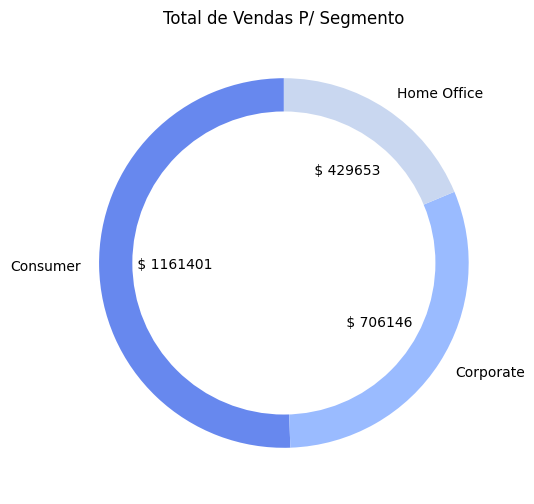

In [80]:
#Tamanho do gráfico
plt.figure(figsize = (16,6))

#Plot
plt.pie(df_p4['Valor_Venda'],
       labels = df_p4['Segmento'],
       autopct = autopct_format(df_p4['Valor_Venda']),
       startangle = 90)

#Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

total_vendas = df['Valor_Venda'].sum()

#Labels
plt.title('Total de Vendas P/ Segmento')
plt.show()

## Pergunta de Negócio 5:

### Qual o Total de Vendas Por Segmento e Por Ano?

In [81]:
# Converter a coluna de data para o formato datetime
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], format='%m/%d/%Y', dayfirst=True)

In [82]:
df.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
Ship_Mode               object
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [83]:
# Extraímos o ano criando nova variável
df['Ano'] = df['Data_Pedido'].dt.year

In [84]:
df.head()

,ID_Pedido,Data_Pedido,Ship_Mode,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2016-152156,2016-11-08,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2016
1,CA-2016-152156,2016-11-08,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2016
2,CA-2016-138688,2016-06-12,Second Class,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2016
3,US-2015-108966,2015-10-11,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2015
4,US-2015-108966,2015-10-11,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2015


In [85]:
# Total de vendas por segmento e por ano
df_p5 = df.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()

In [86]:
df_p5

Ano   Segmento   
2014  Consumer       266096.8126
      Corporate      128434.8737
      Home Office     89715.8118
2015  Consumer       266535.9333
      Corporate      128757.3069
      Home Office     75239.2688
2016  Consumer       296863.8992
      Corporate      207106.3618
      Home Office    105235.3370
2017  Consumer       331904.6999
      Corporate      241847.8244
      Home Office    159462.7309
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 6:

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [87]:
# Criar uma nova coluna de acordo com a regra definida
df_teste = df[df['Valor_Venda'] > 1000]
contador = len(df_teste)
print('o n é: ', contador)

o n é:  468


In [88]:
# Total por cada valor da variável
df['Desconto'] = np.where(df['Valor_Venda'] > 1000, 0.15, 0.10)

In [89]:
df.head()

,ID_Pedido,Data_Pedido,Ship_Mode,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2016-152156,2016-11-08,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2016,0.1
1,CA-2016-152156,2016-11-08,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2016,0.1
2,CA-2016-138688,2016-06-12,Second Class,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2016,0.1
3,US-2015-108966,2015-10-11,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2015,0.1
4,US-2015-108966,2015-10-11,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2015,0.1


In [90]:
df['Desconto'].value_counts()

Desconto
0.10    9526
0.15     468
Name: count, dtype: int64

In [91]:
print('No total 457 Vendas Receberiam Desconto de 15%.')

No total 457 Vendas Receberiam Desconto de 15%.


## Pergunta de Negócio 7:

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [92]:
# Criar uma coluna calculando o valor de venda menos o desconto
df['Valor_Venda_Desconto'] = df['Valor_Venda'] - (df['Valor_Venda'] * df['Desconto'])

In [93]:
df.head()

,ID_Pedido,Data_Pedido,Ship_Mode,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto
0,CA-2016-152156,2016-11-08,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2016,0.1,235.76400
1,CA-2016-152156,2016-11-08,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2016,0.1,658.74600
2,CA-2016-138688,2016-06-12,Second Class,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2016,0.1,13.15800
3,US-2015-108966,2015-10-11,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2015,0.1,861.81975
4,US-2015-108966,2015-10-11,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2015,0.1,20.13120


In [94]:
# Filtrar as vendas antes do desconto de 15%
df_vendas_antes_desconto = df.loc[df['Desconto'] == 0.15, 'Valor_Venda']

In [95]:
# Filtrar as vendas depois do desconto de 15%
df_vendas_depois_desconto = df.loc[df['Desconto'] == 0.15, 'Valor_Venda_Desconto']

In [96]:
# Calcular a média das vendas antes do desconto de 15%
media_df_vendas_depois_desconto = df_vendas_depois_desconto.mean()

In [97]:
# Calcular a média das vendas depois do desconto de 15%
media_df_vendas_antes_desconto = df_vendas_antes_desconto.mean()

In [98]:
print('a media de vendas antes do desconto seria: ', media_df_vendas_antes_desconto)

a media de vendas antes do desconto seria:  2115.7458965811966


In [99]:
print('a media de vendas antes do desconto seria: ', media_df_vendas_depois_desconto)

a media de vendas antes do desconto seria:  1798.384012094017


## Pergunta de Negócio 8:

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?


In [100]:
# Extraí o mês e grava em uma nova variável
df['Mes'] = df['Data_Pedido'].dt.month

In [101]:
df.head()

,ID_Pedido,Data_Pedido,Ship_Mode,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto,Mes
0,CA-2016-152156,2016-11-08,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2016,0.1,235.76400,11
1,CA-2016-152156,2016-11-08,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2016,0.1,658.74600,11
2,CA-2016-138688,2016-06-12,Second Class,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2016,0.1,13.15800,6
3,US-2015-108966,2015-10-11,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2015,0.1,861.81975,10
4,US-2015-108966,2015-10-11,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2015,0.1,20.13120,10


In [102]:
# Agrupar por ano, mês e segmento e calcular a soma, média e mediana
df_p8 = df.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])

In [103]:
df_p8

sum        mean  median
Ano  Mes Segmento                                   
2014 1   Consumer      6927.8170  141.384020  32.340
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate     1183.6680   98.639000  73.460
...                          ...         ...     ...
2017 11  Corporate    44644.0762  338.212698  79.975
         Home Office  24013.6840  245.037592  54.656
     12  Consumer     50232.4558  186.737754  52.776
         Corporate    20524.4320  153.167403  46.460
         Home Office  13072.4310  221.566627  50.040

[144 rows x 3 columns]

In [104]:
# Extrair os níveis
anos = df_p8.index.get_level_values(0)
meses = df_p8.index.get_level_values(1)
segmentos = df_p8.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

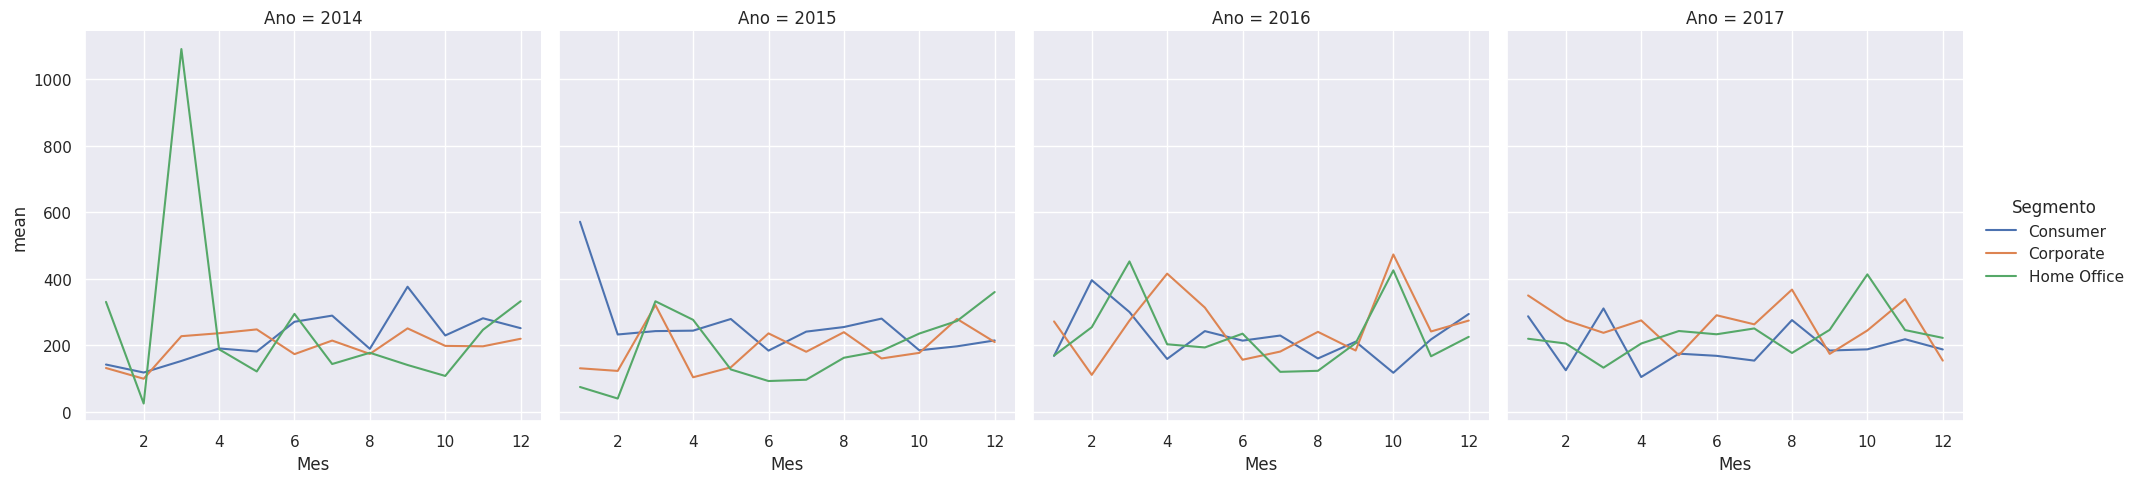

In [105]:
#Plot
plt.figure(figsize = (12,6))
sns.set()
figl = sns.relplot(kind = 'line',
                  data = df_p8,
                  y = 'mean',
                  x = meses,
                  hue = segmentos,
                  col = anos,
                  col_wrap = 4)
plt.show()

## Pergunta de Negócio 9:

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?

In [106]:
# Agrupar por categoria e subcategoria e calcular a soma somente para variáveis numéricas
df_p9 = df.groupby(['Categoria', 'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda', ascending = False).head(12)
df_p9.head(12)

Valor_Venda      Ano  Desconto  \
Categoria       SubCategoria                                   
Technology      Phones        330007.0540  1791977     92.35   
Furniture       Chairs        328449.1030  1243671     65.50   
Office Supplies Storage       223843.6080  1705299     86.95   
Furniture       Tables        206965.5320   643008     35.00   
Office Supplies Binders       203412.7330  3069970    154.50   
Technology      Machines      189238.6310   231797     13.65   
                Accessories   167380.3180  1562213     79.00   
                Copiers       149528.0300   137070      8.55   
Furniture       Bookcases     114879.9963   459589     24.10   
Office Supplies Appliances    107532.1610   939341     47.70   
Furniture       Furnishings    91705.1640  1929060     95.95   
Office Supplies Paper          78479.2060  2761561    137.00   

                              Valor_Venda_Desconto    Mes  
Categoria       SubCategoria                               
Technology      Phones                291253.04230   6783  
Furniture       Chairs                289126.80010   4979  
Office Supplies Storage               198214.71570   6669  
Furniture       Tables                181162.72635   2524  
Office Supplies Binders               177280.47575  11860  
Technology      Machines              162213.65840    897  
                Accessories           148292.68030   6170  
                Copiers               128191.79700    534  
Furniture       Bookcases             100915.90539   1745  
Office Supplies Appliances             94941.80540   3665  
Furniture       Furnishings            82252.70100   7544  
Office Supplies Paper                  70631.28540  10710

In [107]:
# Converter a coluna Valor_Venda em número inteiro e classificar por categoria
df_p9 = df_p9[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

In [108]:
df_p9

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,328449
1,Furniture,Tables,206965
2,Furniture,Bookcases,114879
3,Furniture,Furnishings,91705
4,Office Supplies,Storage,223843
5,Office Supplies,Binders,203412
6,Office Supplies,Appliances,107532
7,Office Supplies,Paper,78479
8,Technology,Phones,330007
9,Technology,Machines,189238


In [109]:
# Cria outro dataframe somente com os totais por categoria
df_p9_cat = df_p9.groupby('Categoria').sum(numeric_only = True).reset_index()

In [110]:
df_p9_cat

,Categoria,Valor_Venda
0,Furniture,741998
1,Office Supplies,613266
2,Technology,836153


In [111]:
# Lista de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

In [112]:
# Lista de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

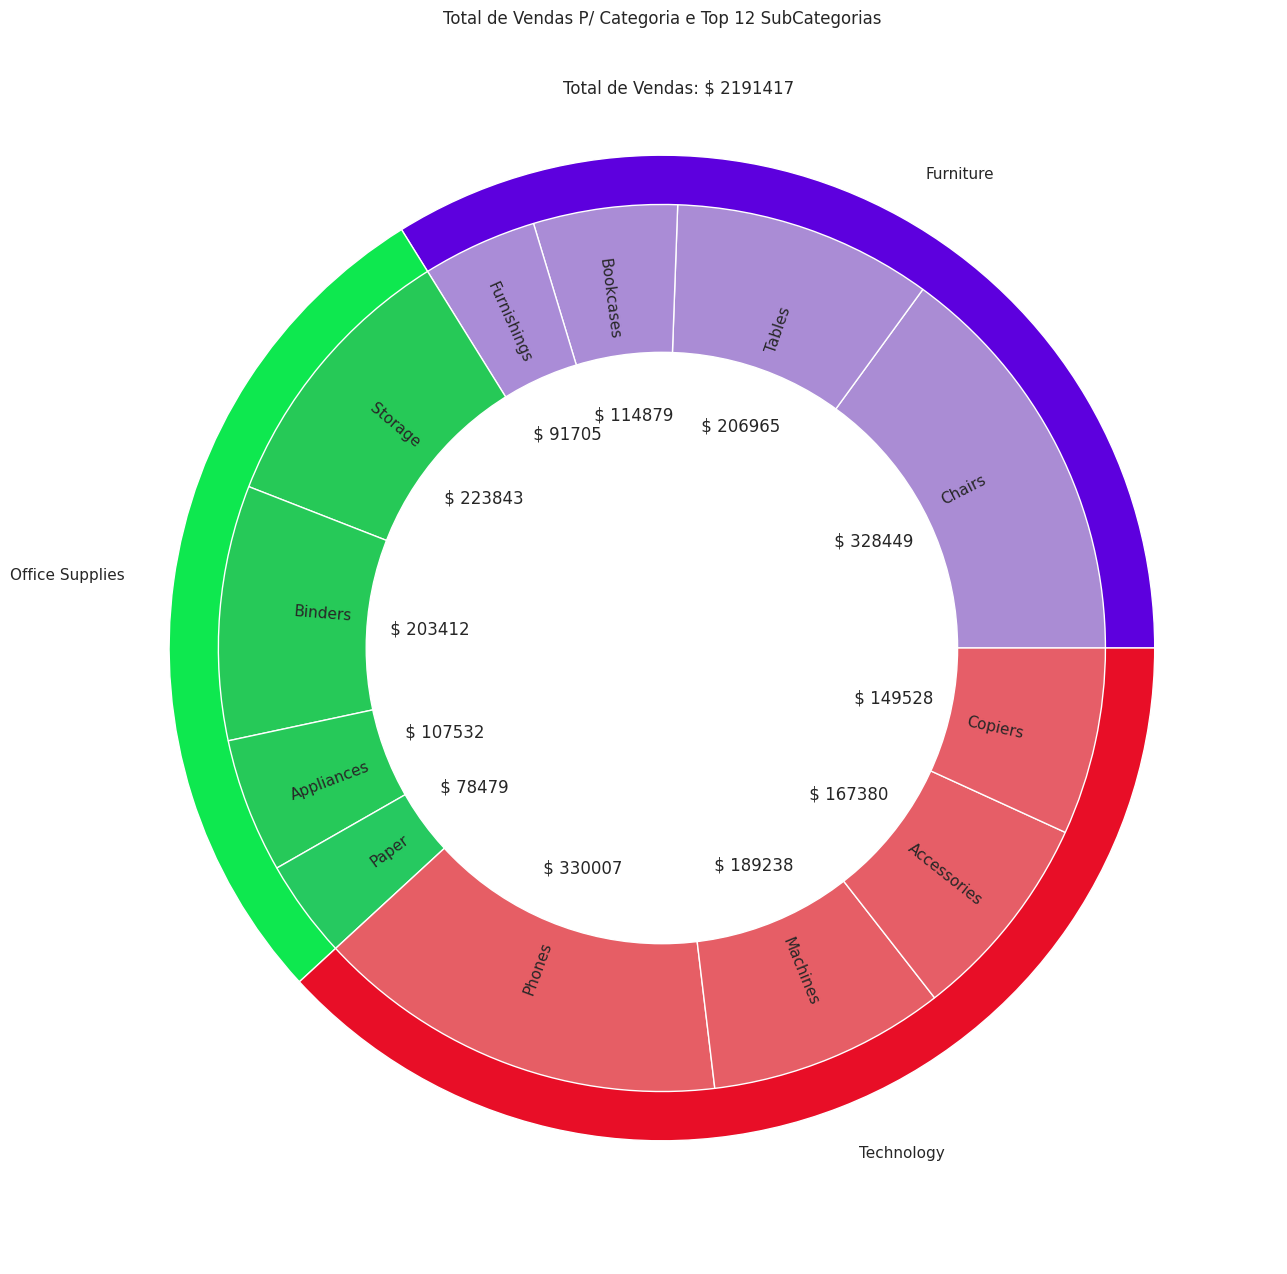

In [116]:
# Plot
# Tamanho da figura
fig, ax = plt.subplots(figsize = (20,16))

# Plot das categorias
p1 = ax.pie(df_p9_cat['Valor_Venda'],
           radius = 1,
           labels = df_p9_cat['Categoria'],
           wedgeprops = dict(edgecolor = 'white'),
           colors = cores_categorias)

# Plot das subcategorias
p2 = ax.pie(df_p9['Valor_Venda'],
           radius = 0.9,
           labels = df_p9['SubCategoria'],
           autopct = autopct_format(df_p9['Valor_Venda']),
           colors = cores_subcategorias,
           labeldistance = 0.7,
           wedgeprops = dict(edgecolor = 'white'),
           pctdistance = 0.53,
           rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_p9['Valor_Venda']))), xy = (-0.20, 1.125))
plt.title('Total de Vendas P/ Categoria e Top 12 SubCategorias')
plt.show()

# Fim